# Introduction

This notebook explores ensemble techniques, which are powerful methods for improving the predictive performance of machine learning models. Ensemble methods combine multiple individual models to create a stronger, more accurate model. These types of models can be used for all kinds of tasks including classification, regression and detecting anomalies. The notebook covers the following ensemble techniques:

1. Voting (both hard voting and soft voting)
2. Bagging
3. Boosting
4. Stacking

We will explore each technique and demonstrate its implementation considering the classification domain using the scikit-learn library.

## 1- Imports all the needed libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from pandas_profiling import ProfileReport

<a name='2'></a>

## 2- Loading the data

In this notebook, we will identify the increase or decrease of the electricity using "the data that was collected from the Australian New South Wales Electricity Market. In this market, prices are not fixed and are affected by demand and supply of the market. They are set every five minutes. Electricity transfers to/from the neighboring state of Victoria were done to alleviate fluctuations."

"The dataset contains 45,312 instances dated from 7 May 1996 to 5 December 1998. Each example of the dataset refers to a period of 30 minutes, i.e. there are 48 instances for each time period of one day. Each example on the dataset has 5 fields, the day of week, the time stamp, the New South Wales electricity demand, the Victoria electricity demand, the scheduled electricity transfer between states and the class label. The class label identifies the change of the price (UP or DOWN) in New South Wales relative to a moving average of the last 24 hours (and removes the impact of longer term price trends). Source: [Open ML electricity](https://www.openml.org/d/151).

Here are the information about the features:
* Date: date between 7 May 1996 to 5 December 1998. Here normalized between 0 and 1 
* Day: day of the week (1-7) 
* Period: time of the measurement (1-48) in half hour intervals over 24 hours. Here normalized between 0 and 1 
* NSWprice: New South Wales electricity price, normalized between 0 and 1 
* NSWdemand: New South Wales electricity demand, normalized between 0 and 1 
* VICprice: Victoria electricity price, normalized between 0 and 1 
* VICdemand: Victoria electricity demand, normalized between 0 and 1 
* transfer: scheduled electricity transfer between both states, normalized between 0 and 1 


Let's load the dataset using Sklearn `fetch_openml` function. 

In [2]:
# Let's hide warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import fetch_openml

elec_data = fetch_openml(name='electricity', version=1)

In [4]:
type(elec_data)

sklearn.utils._bunch.Bunch

In [5]:
elec_data.details

{'id': '151',
 'name': 'electricity',
 'version': '1',
 'description_version': '1',
 'format': 'ARFF',
 'creator': ['M. Harries', 'J. Gama', 'A. Bifet'],
 'collection_date': '1998-12-05',
 'upload_date': '2014-04-10T02:42:23',
 'language': 'English',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/2419/electricity.arff',
 'parquet_url': 'http://openml1.win.tue.nl/dataset151/dataset_151.pq',
 'file_id': '2419',
 'default_target_attribute': 'class',
 'version_label': '1',
 'tag': ['AzurePilot',
  'concept_drift',
  'electricity',
  'mythbusting_1',
  'OpenML-CC18',
  'OpenML100',
  'study_1',
  'study_123',
  'study_135',
  'study_14',
  'study_15',
  'study_16',
  'study_20',
  'study_34',
  'study_37',
  'study_41',
  'study_7',
  'study_70',
  'study_99'],
 'visibility': 'public',
 'original_data_url': 'http://www.inescporto.pt/~jgama/ales/ales_5.html',
 'paper_url': 'http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.43.9013',
 'minio_url': 'http://openml1

In [7]:
elec_data.data.shape

(45312, 8)

**Description of the dataset:**


In [8]:
print(elec_data.DESCR)

**Author**: M. Harries, J. Gama, A. Bifet  
**Source**: [Joao Gama](http://www.inescporto.pt/~jgama/ales/ales_5.html) - 2009  
**Please cite**: None  

**Electricity** is a widely used dataset described by M. Harries and analyzed by J. Gama (see papers below). This data was collected from the Australian New South Wales Electricity Market. In this market, prices are not fixed and are affected by demand and supply of the market. They are set every five minutes. Electricity transfers to/from the neighboring state of Victoria were done to alleviate fluctuations.

The dataset (originally named ELEC2) contains 45,312 instances dated from 7 May 1996 to 5 December 1998. Each example of the dataset refers to a period of 30 minutes, i.e. there are 48 instances for each time period of one day. Each example on the dataset has 5 fields, the day of week, the time stamp, the New South Wales electricity demand, the Victoria electricity demand, the scheduled electricity transfer between states and the 

**Dataset features:**

In [9]:
elec_data.feature_names

['date',
 'day',
 'period',
 'nswprice',
 'nswdemand',
 'vicprice',
 'vicdemand',
 'transfer']

In [10]:
elec_data.target_names

['class']

**Getting the whole dataframe:**


In [11]:
elec_df = elec_data.frame

In [12]:
type(elec_df)

pandas.core.frame.DataFrame

<a name='3'></a>
## 3 - Exploratory Data Analysis (EDA)


In [26]:
ProfileReport(elec_df)

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Taking a quick look into the dataset

In [13]:
#Displaying the first 5 rows 
elec_df.head()

date day    period  nswprice  nswdemand  vicprice  vicdemand  transfer  \
0   0.0   2  0.000000  0.056443   0.439155  0.003467   0.422915  0.414912   
1   0.0   2  0.021277  0.051699   0.415055  0.003467   0.422915  0.414912   
2   0.0   2  0.042553  0.051489   0.385004  0.003467   0.422915  0.414912   
3   0.0   2  0.063830  0.045485   0.314639  0.003467   0.422915  0.414912   
4   0.0   2  0.085106  0.042482   0.251116  0.003467   0.422915  0.414912   

  class  
0    UP  
1    UP  
2    UP  
3    UP  
4  DOWN

In [14]:
# Displaying the last 5 rows 
elec_df.tail()

date day    period  nswprice  nswdemand  vicprice  vicdemand  \
45307  0.9158   7  0.914894  0.044224   0.340672  0.003033   0.255049   
45308  0.9158   7  0.936170  0.044884   0.355549  0.003072   0.241326   
45309  0.9158   7  0.957447  0.043593   0.340970  0.002983   0.247799   
45310  0.9158   7  0.978723  0.066651   0.329366  0.004630   0.345417   
45311  0.9158   7  1.000000  0.050679   0.288753  0.003542   0.355256   

       transfer class  
45307  0.405263  DOWN  
45308  0.420614  DOWN  
45309  0.362281  DOWN  
45310  0.206579    UP  
45311  0.231140  DOWN

In [15]:
elec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45312 entries, 0 to 45311
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   date       45312 non-null  float64 
 1   day        45312 non-null  category
 2   period     45312 non-null  float64 
 3   nswprice   45312 non-null  float64 
 4   nswdemand  45312 non-null  float64 
 5   vicprice   45312 non-null  float64 
 6   vicdemand  45312 non-null  float64 
 7   transfer   45312 non-null  float64 
 8   class      45312 non-null  category
dtypes: category(2), float64(7)
memory usage: 2.5 MB


Since the `day` feature type is category, we need to check its values and handle incosisitent values and then convert it into numric values.

In [16]:
elec_df.day.value_counts()

2    6480
3    6480
4    6480
5    6480
6    6480
7    6480
1    6432
Name: day, dtype: int64

In [17]:
elec_df['day'] = pd.to_numeric(elec_df['day'])

In [18]:
elec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45312 entries, 0 to 45311
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   date       45312 non-null  float64 
 1   day        45312 non-null  int64   
 2   period     45312 non-null  float64 
 3   nswprice   45312 non-null  float64 
 4   nswdemand  45312 non-null  float64 
 5   vicprice   45312 non-null  float64 
 6   vicdemand  45312 non-null  float64 
 7   transfer   45312 non-null  float64 
 8   class      45312 non-null  category
dtypes: category(1), float64(7), int64(1)
memory usage: 2.8 MB


Two things to draw from the dataset for now:

* The target feature `class` is categorical. We will make sure to encode that during data preprocessing. 
* All numerical features are already normalized, so we won't need to normalize these type of features.

### Checking Summary Statistics

In [20]:
# Summary stats
elec_df.describe()

date           day        period      nswprice     nswdemand  \
count  45312.000000  45312.000000  45312.000000  45312.000000  45312.000000   
mean       0.499080      4.003178      0.500000      0.057868      0.425418   
std        0.340308      1.998695      0.294756      0.039991      0.163323   
min        0.000000      1.000000      0.000000      0.000000      0.000000   
25%        0.031934      2.000000      0.250000      0.035127      0.309134   
50%        0.456329      4.000000      0.500000      0.048652      0.443693   
75%        0.880547      6.000000      0.750000      0.074336      0.536001   
max        1.000000      7.000000      1.000000      1.000000      1.000000   

           vicprice     vicdemand      transfer  
count  45312.000000  45312.000000  45312.000000  
mean       0.003467      0.422915      0.500526  
std        0.010213      0.120965      0.153373  
min        0.000000      0.000000      0.000000  
25%        0.002277      0.372346      0.414912  
50%        0.003467      0.422915      0.414912  
75%        0.003467      0.469252      0.605702  
max        1.000000      1.000000      1.000000

### Checking Missing Values

In [21]:
# Checking missing values
elec_df.isnull().sum()

date         0
day          0
period       0
nswprice     0
nswdemand    0
vicprice     0
vicdemand    0
transfer     0
class        0
dtype: int64

Great, we don't have any missing values. Usually, there are three things to do with them if they are present:
* We can remove all missing values completely
* We can leave them as they are or
* We can fill them with a given strategy such as mean, median, or most frequent value. Either `Sklearn` or Pandas provides a quick way to fill these kinds of values. 


For a full guide on handling missing values, There is [a comprehensive article](https://medium.com/analytics-vidhya/a-comprehensive-guide-for-handling-missing-values-990c999c49ed?source=---------11----------------------------) for handling missing values but one thing to note is that none of the above techniques is best than others. It depends on the size of your data and your goal. Removing missing values is losing data, and filling in missing values is adding noise to the data. 

### Checking Correlation

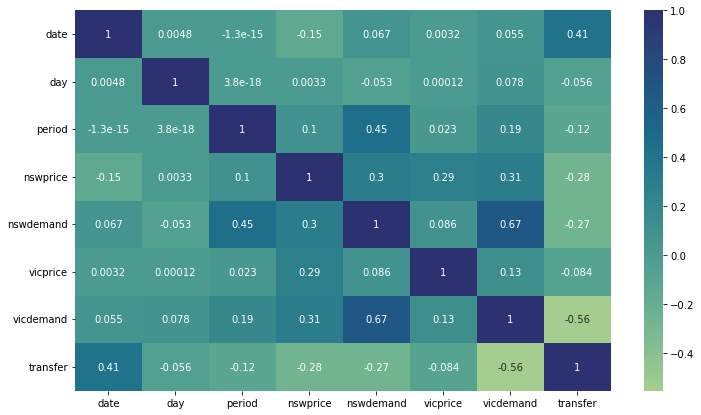

In [22]:
# Checking feature correlation
corr = elec_df.corr()

# Visualizing correlation
plt.figure(figsize=(12,7))
sns.heatmap(corr,annot=True, cmap='crest');

The correlation shown above varies from `-1 to 1`. If the correlation between two features is close to 1, it means that they nearly contain the same information. If it is close to -1, it means that these features contain different information. Take an example: `vicdemand` correlate with `nswdeman` at 0.67 ratio. 

So if you drop one of those features, it's likely that your model will not be affected much. So different to what you have seen in many articles, having features which does not correlate to the target feature doesn't mean they are not useful. 

In the above correlation matrix, you can see that class feature is not there and this is because it still has categorical values. 

<a name='4'></a>

## 4 - Data Preprocessing 

It is here that we prepare the data to be in the proper format for the machine learning model. 

Let's encode the categorical feature `class`. But before that, let's take training input data and labels.

In [23]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(elec_df, test_size=0.25, random_state=42) #Why its return only 2 variables?

print('The size of training data is: {} \nThe size of testing data is: {}'.format(len(train_data), len(test_data)))


The size of training data is: 33984 
The size of testing data is: 11328


In [24]:
X_train = train_data.drop('class', axis=1)
y_train = train_data['class']

X_test= test_data.drop('class', axis=1)
y_test = test_data['class']

In [25]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
y_train = label_enc.fit_transform(y_train)
y_test = label_enc.transform(y_test)

Now we are ready to train the machine learning model. 

But again if you look at the dat, the `day` feature is not normalized as other features. We can normalize it or leave it but for now let's go ahead and train the random forests classifier. 

<a name='5'></a>

## 5 - Training Ensemble Classifiers


<h2 style="color:blue" align="center"> 5.1 Voting (Hard/Soft) </h2>

Voting is an ensemble technique that combines the predictions of multiple models by majority voting (classification) or averaging (regression). It leverages the wisdom of the crowd to make final predictions.

**Reminder: The number of classifiers used in voting must be ODD if the problem is a binary classification.**

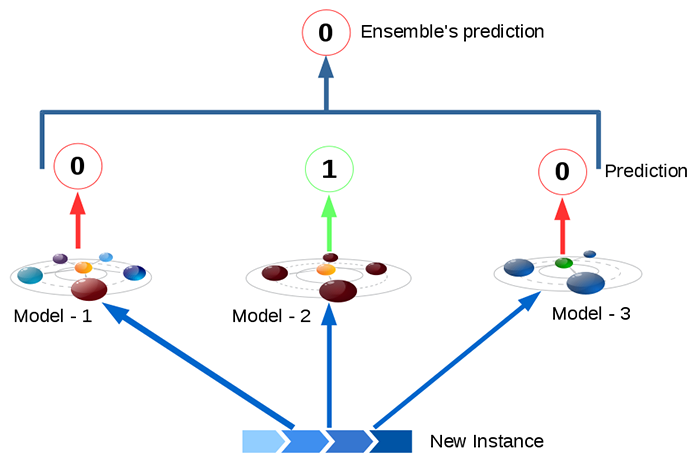


Hard voting and soft voting are two different strategies used in voting ensemble learning. Here's an explanation of each strategy:


1. **Hard Voting:**

	- In hard voting, the final prediction is determined by a simple majority vote among the individual models in the ensemble.
    - Each model in the ensemble casts a "vote" for its predicted class label, and the class label that receives the majority of the votes becomes the final prediction.
    - Hard voting is commonly used for classification problems and can be effective when the individual models in the ensemble have diverse strengths and weaknesses.


2. **Soft Voting:**

	- In soft voting, the final prediction is based on the weighted average of the predicted class probabilities from the individual models.
	- Instead of considering only the class labels, soft voting takes into account the probabilities or confidence scores assigned by each model for each class.
	- The class probabilities from each model are averaged (weighted by their confidence or performance) to calculate the final probabilities, and the class with the highest probability becomes the final prediction.
	- Soft voting can be more robust than hard voting because it considers the confidence levels of the models' predictions.
    
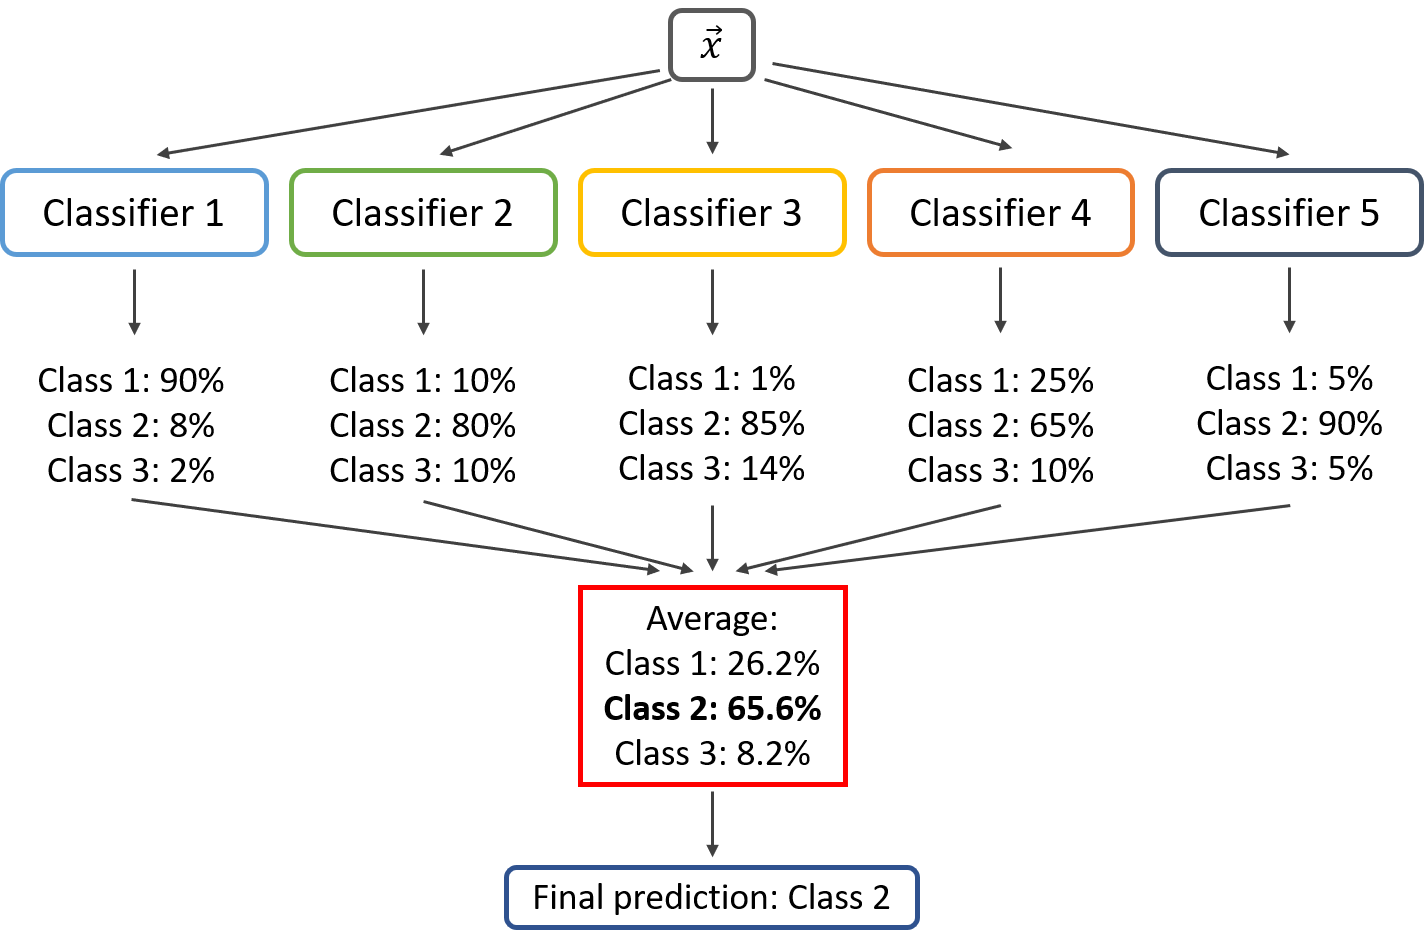
    
    
When to use hard voting vs soft voting depends on the problem at hand and the characteristics of the models in the ensemble. In general, soft voting is often preferred when the models produce well-calibrated probability estimates, while hard voting can still be effective when the models have high accuracy but may not provide reliable probability estimates.

It is important to note that not all models are capable of providing class probabilities. Models like decision trees or k-nearest neighbors do not inherently provide probabilities, so they need to be paired with techniques like Platt scaling or isotonic regression to enable soft voting. On the other hand, models like logistic regression or support vector machines naturally produce probabilities and can be used in soft voting without additional modifications.

Choosing between hard voting and soft voting depends on the specific problem, the models being used, and the available data. It is recommended to experiment with both strategies and evaluate their performance on the given task to determine which approach works best.

In [27]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [26]:
# Create base models
base_model_1 = DecisionTreeClassifier(random_state=42)
base_model_2 = KNeighborsClassifier()
base_model_3 = LogisticRegression(random_state=42)

# Create a voting classifier
voting_model = VotingClassifier(
    estimators=[('dt', base_model_1), ('knn', base_model_2), ('lr', base_model_3)],
    voting='hard')

# Train the voting classifier
voting_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = voting_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Hard Voting Accuracy: %0.2f%%" %(accuracy*100))

Hard Voting Accuracy: 85.92%


In [27]:
# Create base models
base_model_1 = DecisionTreeClassifier(random_state=42)
base_model_2 = KNeighborsClassifier()
base_model_3 = LogisticRegression(random_state=42)

# Create a voting classifier
voting_model = VotingClassifier(
    estimators=[('dt', base_model_1), ('knn', base_model_2), ('lr', base_model_3)],
    voting='soft')

# Train the voting classifier
voting_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = voting_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Soft Voting Accuracy: %0.2f%%" %(accuracy*100))

Soft Voting Accuracy: 88.61%


<h2 style="color:blue" align="center"> 5.2 Bagging </h2>

Bagging, short for bootstrap aggregating, is an ensemble technique that builds multiple models using different subsets of the training data and then combines their predictions by averaging or voting. The idea behind bagging is to reduce variance and improve model stability.

When this is used with complex models (that overfit data easily) like decision trees, the overfitting can be reduced. 

**Please note that: Bagging requires only 1 base classifier.**
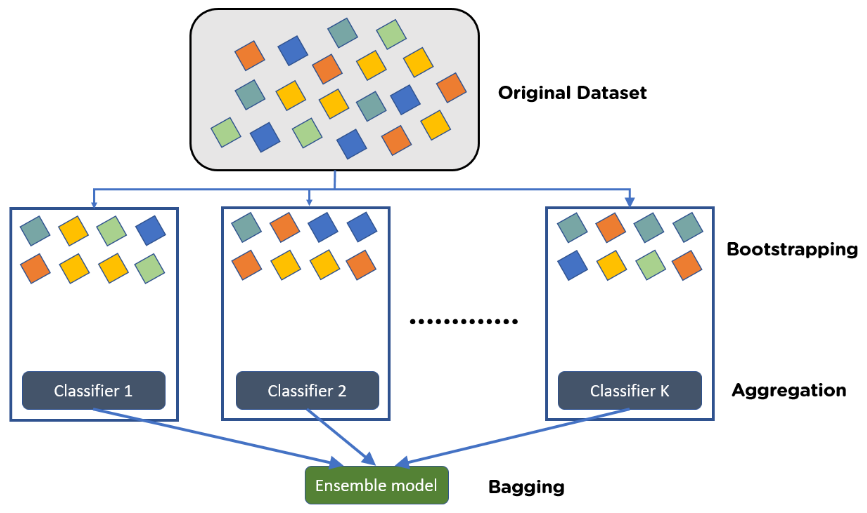


Let's use bagging to train 500 decision trees on different subsets of data and then average the predictions on those subsets. 

By setting `max_samples=0.5`, `max_features=0.5`, `bootstrap=False`, we are using random subsets of 50% of training data and random 50% subsets of features. If bootstrap is `True`, ratio of those training samples are sampled from the training data with replacement and if it is False, there is no replecement. When in fact bootstrap is `False`, this is called Pasting. There are also other techniques called Random Subspaces and Random Patches and they are all based off how the samples are drawn from the data. Learn more about these techniques and more about other hyperparameters on the [Scikit-Learn documentation](https://scikit-learn.org/stable/modules/ensemble.html#bagging). 

One of the great way to improve a particular machine learning model is to learn about its hyperparameters and what each and each stands for. So, learn more about Bagging [here](https://scikit-learn.org/stable/modules/ensemble.html#id2). 

In [29]:
from sklearn.ensemble import BaggingClassifier

In [30]:
# Create a decision tree classifier
base_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Create a bagging classifier
bagging_model = BaggingClassifier(base_model, n_estimators=10, 
                                  max_samples=0.5, max_features=0.5, 
                                  bootstrap=False, random_state=42) #bootstrap=True

# Train the bagging classifier
bagging_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bagging_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Bagging Accuracy: %0.2f%%" %(accuracy*100))

Bagging Accuracy: 85.97%


Wow, this is much better. Bagging ensembles work well and they outperform Voting ensembles. Other remarkable thing about them is that they are able to overcome the overfitting especially when used with decision trees (decision trees tend to overfit easily). Let's now see other type of ensemble models: Gradient Boosting Classifier.

<h2 style="color:blue" align="center"> 5.3 Boosting</h2>


Boosting is an ensemble technique that sequentially builds a strong model by combining weak models. It assigns higher weights to misclassified instances and trains subsequent models to focus on those instances, thereby reducing bias and improving overall performance.

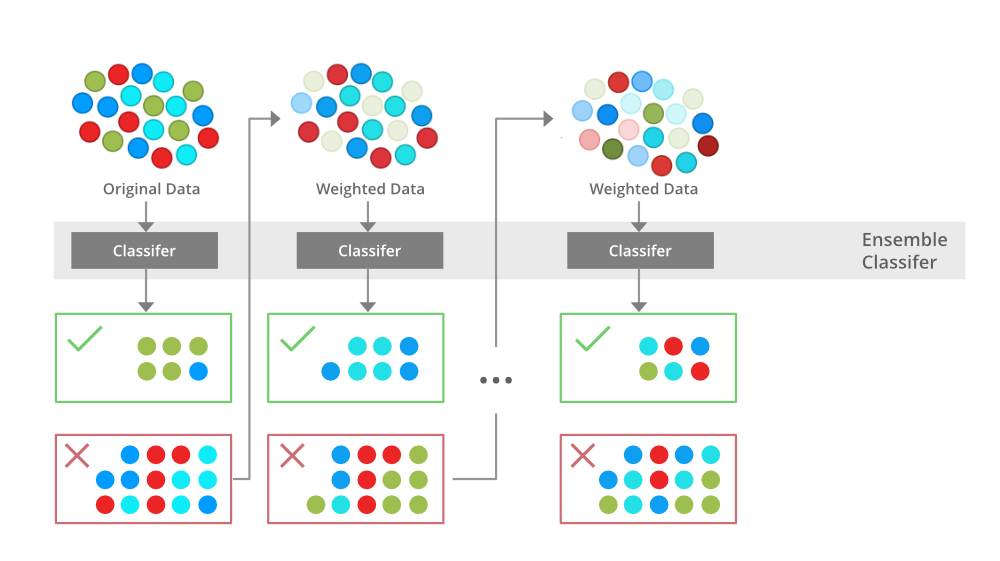

**Adaptive Boosting (AdaBoost) Classifier**

AdaBoost is ensemble model in class of boosting methods. It's very much like gradient boost but instead of minimizing the error of the consecutive models, it updates the weights.

So, the first model (decision tree) is trained on the full training data, the next model weights are updated based off the previous weights and so forth.

The main parameters to tune to make AdaBoost work well are number of estimators and the maximum depth of each estimator.

In [35]:
from sklearn.ensemble import AdaBoostClassifier #RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [38]:
# Create a decision tree classifier
base_model = DecisionTreeClassifier(random_state=42)

# Create an AdaBoost classifier
boosting_model = AdaBoostClassifier(base_model, n_estimators=10, random_state=42) #base estimator is decision trees by default

# Train the AdaBoost classifier
boosting_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = boosting_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Boosting Accuracy: %0.2f%%" %(accuracy*100))

Boosting Accuracy: 88.38%


Again, you can tune the number of estimators and the depth of the base estimator. The base estimator is Decision Trees by default. 

<h2 style="color:blue" align="center"> 5.4 Stacking</h2>

Stacking is an ensemble technique that combines multiple models that are trained on the full training data and then training a meta-model (final model) on their predictions. The idea is to use the predictions of the base models as input features for the meta-model, which learns to make the final predictions.


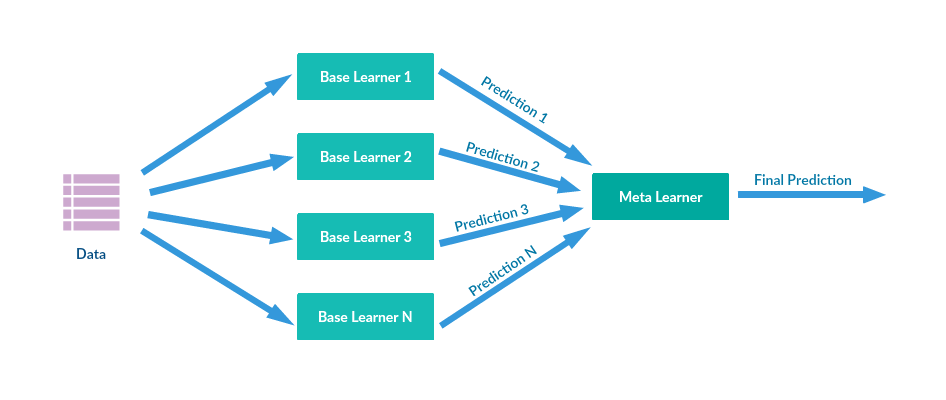


In [40]:
from sklearn.ensemble import StackingClassifier

In [41]:
# Create base models
base_model_1 = DecisionTreeClassifier(random_state=42)
base_model_2 = KNeighborsClassifier()

# Create a meta-model
meta_model = LogisticRegression(random_state=42)

# Create a stacking classifier
stacking_model = StackingClassifier(
    estimators=[('dt', base_model_1), ('knn', base_model_2)],
    final_estimator=meta_model
)

# Train the stacking classifier
stacking_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = stacking_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Stacking Accuracy: %0.2f%%" %(accuracy*100))

Stacking Accuracy: 88.76%
